<a href="https://colab.research.google.com/github/ShakirJ25/QNC-Exercises/blob/main/Parametric_correlation_coefficient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

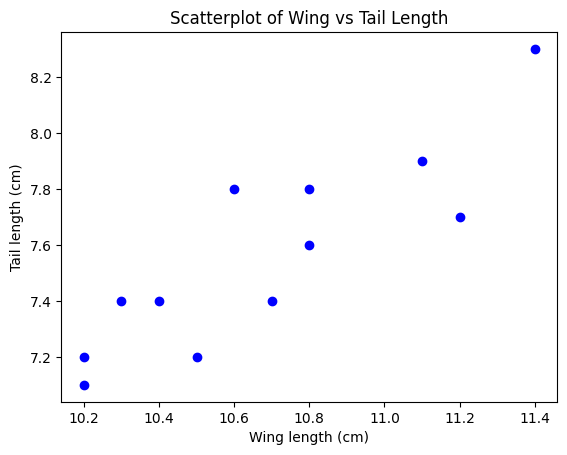

Manual r_xy: 0.8703545613058226
Manual r_yx: 0.8703545613058226
Numpy corrcoef: 0.8703545613058227
Standard error: 0.15571863652567383
95% CI: [0.59230328 0.96316073]
t-statistic: 5.589276792584325 p-value: 0.00023110594312059085
Test vs r=0.75 -> z: 1.0847547271784312 p-value: 0.2780303018608836
Sample size needed (80% power, r=0.5): 30


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Data from the exercise
X = np.array([10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4])
Y = np.array([7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3])

# 1. Plot X vs Y
plt.scatter(X, Y, color='blue')
plt.xlabel("Wing length (cm)")
plt.ylabel("Tail length (cm)")
plt.title("Scatterplot of Wing vs Tail Length")
plt.show()

# 2. Calculate correlation manually and with numpy
def correlation_manual(x, y):
    x_mean, y_mean = np.mean(x), np.mean(y)
    num = np.sum((x - x_mean) * (y - y_mean))
    den = np.sqrt(np.sum((x - x_mean)**2) * np.sum((y - y_mean)**2))
    return num / den

r_xy = correlation_manual(X, Y)
r_yx = correlation_manual(Y, X)
r_numpy = np.corrcoef(X, Y)[0, 1]

print("Manual r_xy:", r_xy)
print("Manual r_yx:", r_yx)
print("Numpy corrcoef:", r_numpy)

# 3. Standard error and 95% CI
n = len(X)
se = np.sqrt((1 - r_xy**2) / (n - 2))

# Fisher z transform for CI
z = np.arctanh(r_xy)
z_se = 1 / np.sqrt(n - 3)
z_ci = [z - 1.96*z_se, z + 1.96*z_se]
r_ci = np.tanh(z_ci)

print("Standard error:", se)
print("95% CI:", r_ci)

# 4. Significance test H0: r=0
t_stat = r_xy / se
df = n - 2
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))
print("t-statistic:", t_stat, "p-value:", p_value)

# 5. Test H0: r = 0.75
r0 = 0.75
z_obs = np.arctanh(r_xy)
z_null = np.arctanh(r0)
z_test_stat = (z_obs - z_null) / z_se
p_value_r075 = 2 * (1 - stats.norm.cdf(abs(z_test_stat)))
print("Test vs r=0.75 -> z:", z_test_stat, "p-value:", p_value_r075)

# 6. Power and sample size for detecting r >= 0.5
r_true = 0.5
alpha = 0.05
z_alpha = stats.norm.ppf(1 - alpha/2)

# Compute required sample size with Fisher z method
effect_size = np.arctanh(r_true) - np.arctanh(0)
power = 0.8
z_beta = stats.norm.ppf(power)

n_required = ( (z_alpha + z_beta) / effect_size )**2 + 3
print("Sample size needed (80% power, r=0.5):", int(np.ceil(n_required)))
